C:\Users\Asus\AppData\Local\Temp\ipykernel_14640\3187453388.py:25: RuntimeWarning: overflow encountered in cast
  discriminant = np.float32(alpha**2 - 1.0)


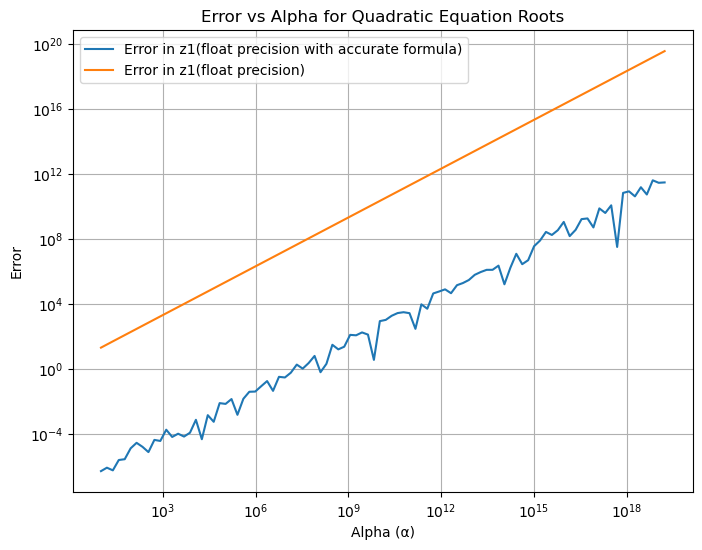

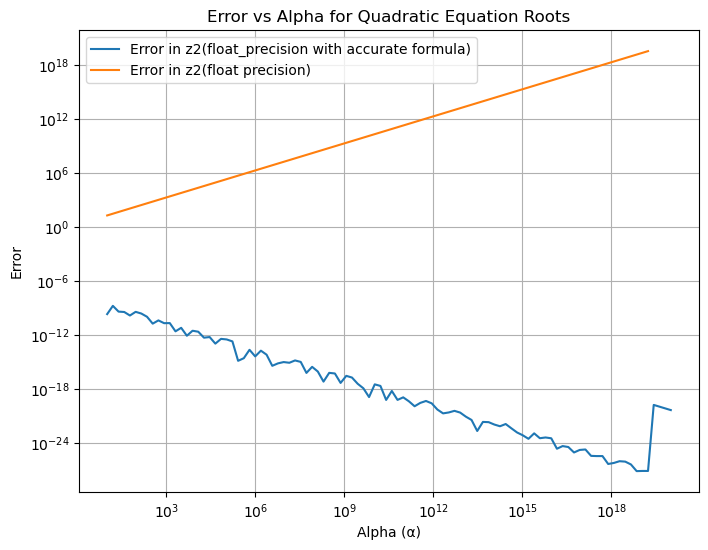

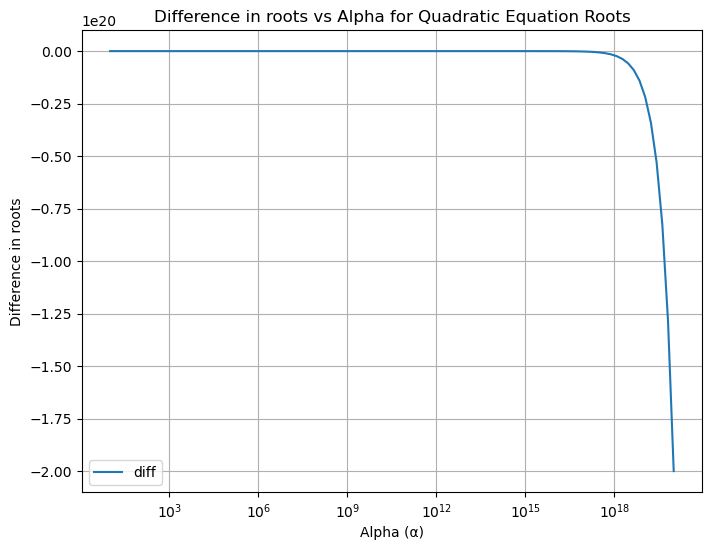

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute the roots using the formula
def compute_roots(alpha, use_accurate=True):
    discriminant = alpha**2 - 1.0
    sqrt_disc = np.sqrt(discriminant)
    
    if use_accurate:
        # More accurate formula for near-cancellation
        p = -(alpha + np.sign(alpha) * sqrt_disc)
        z1 = p
        z2 = 1.0 / p
    else:
        # Standard formula
        z1 = -alpha + sqrt_disc
        z2 = -alpha - sqrt_disc
        
    return z1, z2

# Function to compute the roots in float32 (simulating single precision)
def compute_roots_float32(alpha, use_accurate=True):
    # Use float32 (single precision) instead of the default float64 (double precision)
    alpha = np.float32(alpha)
    discriminant = np.float32(alpha**2 - 1.0)
    sqrt_disc = np.sqrt(discriminant)
    
    if use_accurate:
        p = -(alpha + np.sign(alpha) * sqrt_disc)
        z1 = p
        z2 = 1.0 / p
    else:
        z1 = -alpha + sqrt_disc
        z2 = -alpha - sqrt_disc
        
    return np.float32(z1), np.float32(z2)

# Generate a geometric series of alpha values
def generate_geometric_alpha(alpha_start, alpha_end, N):
    return np.logspace(alpha_start, alpha_end, N)

# Main function to compute errors and plot them
def main(alpha_start, alpha_end, N):
    alphas = generate_geometric_alpha(alpha_start, alpha_end, N)
    
    errors_z1 = []
    errors_z2 = []
    errors_z11 = []
    errors_z21 = []
    diff = []
    for alpha in alphas:
        # Compute roots using double precision (default)
        z1_accurate, z2_accurate = compute_roots(alpha, use_accurate=True)
        
        # Compute roots using float32 (single precision)
        z1_float321, z2_float321 = compute_roots_float32(alpha, use_accurate=False)
        z1_float32, z2_float32 = compute_roots_float32(alpha, use_accurate=True)
        
        # Compute the errors
        error_z1 = np.abs(z1_accurate - z1_float32)
        error_z2 = np.abs(z2_accurate - z2_float32)
        error_z11 = np.abs(z1_accurate - z1_float321)
        error_z21 = np.abs(z2_accurate - z2_float321)
        
        errors_z1.append(error_z1)
        errors_z2.append(error_z2)
        errors_z11.append(error_z11)
        errors_z21.append(error_z21)
        diff.append(z1_accurate-z2_accurate)
        
        
    # Plot errors
    plt.figure(figsize=(8, 6))
    plt.loglog(alphas, errors_z1, label="Error in z1(float precision with accurate formula)")
    plt.loglog(alphas,errors_z11, label="Error in z1(float precision)")
    plt.xlabel('Alpha (α)')
    plt.ylabel('Error')
    plt.title('Error vs Alpha for Quadratic Equation Roots')
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.figure(figsize=(8, 6))
    plt.loglog(alphas, errors_z2, label="Error in z2(float_precision with accurate formula)")
    plt.loglog(alphas,errors_z21, label="Error in z2(float precision)")
    plt.xlabel('Alpha (α)')
    plt.ylabel('Error')
    plt.title('Error vs Alpha for Quadratic Equation Roots')
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.figure(figsize=(8, 6))
    plt.semilogx(alphas, diff, label="diff")
    plt.xlabel('Alpha (α)')
    plt.ylabel('Difference in roots')
    plt.title('Difference in roots vs Alpha for Quadratic Equation Roots')
    plt.legend()
    plt.grid(True)
    plt.show()


# Call the main function with the provided parameters
alpha_start = 1
alpha_end = 20
N = 100

main(alpha_start, alpha_end, N)


In [2]:
import numpy as np
import scipy.special as sp

def true_sum(x):
    s = 0
    s_list = []
    for i in range(42):
        s  =  s + sp.jn(i,x)/(i+1)
        s_list.append(s)
    return np.array(s_list)

true_1 = true_sum(1.5)
true_2 = true_sum(15)


In [6]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

# Forward recurrence function to compute J_n(x) for n = 0 to 41
def forward_jn(x):
    j = {}
    # Base cases: J_0(x) and J_1(x)
    j[0] = sp.jn(0, x)
    j[1] = sp.jn(1, x)

    # Recurrence relation for n = 2 to 41
    for n in range(1, 41):  # Starting from n=1 to n=41
        j[n + 1] = (2 * n * j[n]) / x - j[n - 1]  # Recurrence relation
    return j

# Backward recurrence function to compute J_n(x) for n = 60 to 1
def backward_jn(x):
    j = {}
    # Base cases for backward recurrence: J_60(x) = 1, J_61(x) = 0
    j[60] = 1  # J_60(x) = 1
    j[61] = 0  # J_61(x) = 0

    # Recurrence relation for n = 59 to 1 (reverse order)
    for n in reversed(range(59, 0, -1)):  # We now start at n=59 and go down to n=1
        j[n] = (2 * n * j[n + 1]) / x - j[n + 2]  # Recurrence relation for backward sum

    return j

# Compute forward and backward J_n(x) values for x = 1.5 and x = 15
forward_jn_1_5 = forward_jn(1.5)
forward_jn_15 = forward_jn(15)

backward_jn_1_5 = backward_jn(1.5)
backward_jn_15 = backward_jn(15)

# True values for comparison (use scipy's J_n function for true values)
true_1_5 = np.array([sp.jn(n, 1.5) for n in range(42)])  # True values for x = 1.5
true_15 = np.array([sp.jn(n, 15) for n in range(42)])   # True values for x = 15

# Compute errors (absolute difference between true and calculated)
f_err_1_5 = np.abs(true_1_5 - np.array([forward_jn_1_5.get(n, 0) for n in range(42)]))  # Forward error for x = 1.5
f_err_15 = np.abs(true_15 - np.array([forward_jn_15.get(n, 0) for n in range(42)]))  # Forward error for x = 15
b_err_1_5 = np.abs(true_1_5 - np.array([backward_jn_1_5.get(n, 0) for n in range(42)]))  # Backward error for x = 1.5
b_err_15 = np.abs(true_15 - np.array([backward_jn_15.get(n, 0) for n in range(42)]))  # Backward error for x = 15

# Plot errors
plt.figure(figsize=(10, 6))

# Plot errors for x = 1.5
plt.plot(range(42), f_err_1_5, label="Forward Error (x=1.5)", linestyle='-', marker='o')
plt.plot(range(42), b_err_1_5, label="Backward Error (x=1.5)", linestyle='--', marker='x')

# Plot errors for x = 15
plt.plot(range(42), f_err_15, label="Forward Error (x=15)", linestyle='-', marker='o')
plt.plot(range(42), b_err_15, label="Backward Error (x=15)", linestyle='--', marker='x')

# Labels and title
plt.xlabel('Order n')
plt.ylabel('Error (|Calculated - True|)')
plt.title('Error in Bessel Function Calculation (Forward vs Backward)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()




KeyError: 2

In [47]:
def forward_sum(x):
    j = {}
    s_list = []
    s = 0
    j[0] = sp.jn(0,x)
    j[1] = sp.jn(1,x)

    for n in range(42):
        if n!=0:
            j[n+1] = (2*n*j[n])/x - j[n-1]
        s = s + j[n]/(n+1)
        s_list.append(s)

    return np.array(s_list)
forward_1 = forward_sum(1.5)
forward_2 = forward_sum(15)

def backward_sum(x):
    j = {}
    s_list = []
    s = 0
    j[60] = 1
    j[61] = 0

    for n in reversed(range(62)):
        if n!=61:
            j[n-1] = (2*n*j[n])/x - j[n+1]
    Nf = j[0]
    for i in range(62):
       j[i] = j[i]/Nf
    print(j)
    for n in range(42):
        j[n] = j[n]
        s = s + j[n]/(n+1)
        s_list.append(s)

    return np.array(s_list)

backward_1 = backward_sum(1.5)
backward_2 = backward_sum(15)


order  = range(len(true_1))

f_err_1  = np.abs(true_1-forward_1) 
f_err_2  = np.abs(true_2-forward_2) 
b_err_1  = np.abs(true_1-backward_1) 
b_err_2  = np.abs(true_2-backward_2) 






{60: 7.418316487269202e-90, 61: 0.0, 59: 5.934653189815361e-88, 58: 4.667852011006024e-86, 57: 3.60921208985901e-84, 56: 2.742534403091747e-82, 55: 2.0473980997661848e-80, 54: 1.5011510197215599e-78, 53: 1.0806239943895464e-76, 52: 7.634908409333072e-75, 51: 5.292455873143207e-73, 50: 3.5981065028964474e-71, 49: 2.3982084230103174e-69, 48: 1.5664696923831174e-67, 47: 1.0023007822828942e-65, 46: 6.279518432613754e-64, 45: 3.8504356712208194e-62, 44: 2.30963345088923e-60, 43: 1.3545999142878928e-58, 42: 7.764063208466362e-57, 41: 4.346520796826875e-55, 40: 2.375321629277845e-53, 39: 1.2664035502018349e-51, 38: 6.582923139420264e-50, 37: 3.334081320422732e-48, 36: 1.6441551590946057e-46, 35: 7.888610682333685e-45, 34: 3.679707496596625e-43, 33: 1.66734520405557e-41, 32: 7.332639190347912e-40, 31: 3.126925376011054e-38, 30: 1.2917292248322006e-36, 29: 5.163789973952792e-35, 28: 1.9953737273702476e-33, 27: 7.444231458874972e-32, 26: 2.6779279514676198e-30, 25: 9.276039333628872e-29, 24: 3.0

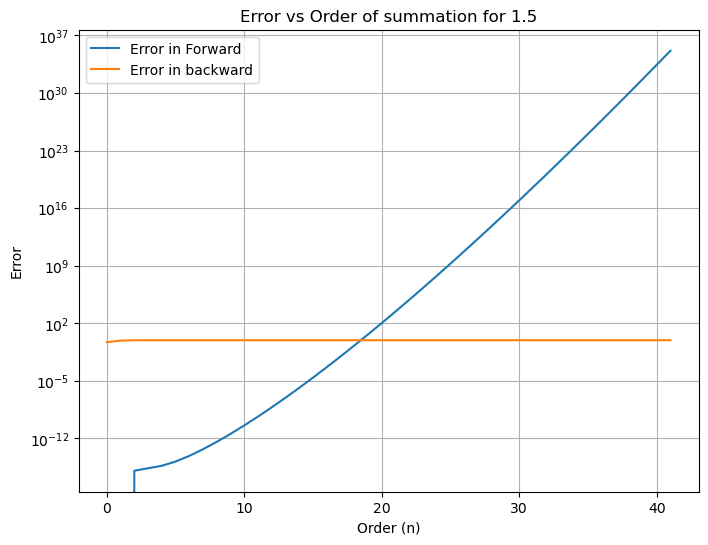

In [48]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.semilogy(order, f_err_1, label="Error in Forward")
plt.semilogy(order, b_err_1, label="Error in backward")
plt.xlabel('Order (n)')
plt.ylabel('Error')
plt.title('Error vs Order of summation for 1.5')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
def backward_sum(x):
    j = {}
    s_list = []
    s = 0
    j[60] = 1
    j[61] = 0

    for n in reversed(range(62)):
        if n!=61:
            j[n-1] = (2*n*j[n])/x - j[n+1]
    Nf = j[0]
    for i in range(62):
       j[i] = j[i]/Nf
    
plt.figure(figsize=(8, 6))
plt.semilogy(order, f_err_2, label="Error in Forward")
plt.semilogy(order, b_err_2, label="Error in backward")
plt.xlabel('Order (n)')
plt.ylabel('Error')
plt.title('Error vs Order of summation for 15')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'order' is not defined

<Figure size 800x600 with 0 Axes>

In [9]:
def b(n,x):
    return -1
def a(n,x):
    return 2*x
def T(n,x):
    if n == 0:
        return 1
    elif n == 1:
        return x

def direct_sum(x,f,n,m):
    c = chebyshev_coeffs(f,m)
    
    t = {}
    t[0] = 1
    t[1] = x
    val  =  c[0]*t[0] 
    for i in range(1,n):
        t[i+1] = 2*x*t[i] - t[i-1]
        val = val+c[i]*t[i]
    return val-1/2*c[0]
def compute_coeff(j,f, N):
    c_j = 0
    for k in range(N):

        x_k = np.cos(np.pi * (k + 1 / 2) / N)
        term_1 = f(x_k)
        term_2 = np.cos(np.pi * j * (k + 1 / 2) / N)
        
        c_j += term_1 * term_2
    
    # Multiply by the constant factor 2/N
    c_j = (2 / N) * c_j
    return c_j

def chebyshev_coeffs(f,N):
    Coeffs = {}

    for i in range(N+1):
        Coeffs[i] = compute_coeff(i,f,N)

    
    return Coeffs
def clenshaw_sum(x,f,n,m):
    c = chebyshev_coeffs(f,m)
    y = {}
    y[n+1] = 0
    y[n+2] = 0
    for k in reversed(range(1,n+1)):
        y[k] = a(k,x)*y[k+1]+ b(k+1,x)*y[k+2] + c[k]
    val = b(1,x)*T(0,x)*y[2] + T(1,x)*y[1] + T(0,x)*c[0]
    return val-1/2*c[0]
def func(x):
    return np.exp(x)


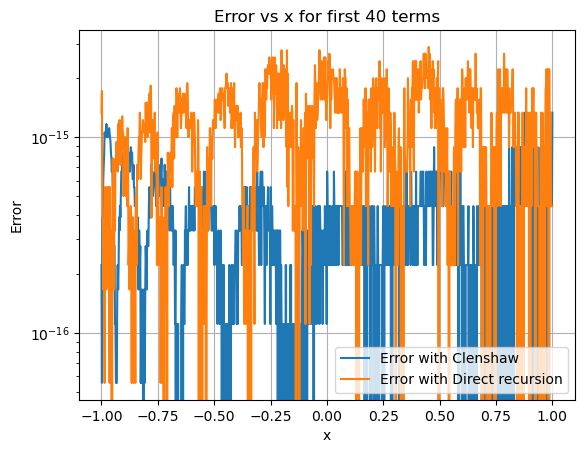

In [10]:
N = 14
M= 40
x = np.linspace(-1, 1, 1000)
y  = func(x)
exact_sum  = y
dir_sum = direct_sum(x,func,N,M)
clen_sum = clenshaw_sum(x,func,N,M)



error_clen = abs(exact_sum - clen_sum)
error_direct = abs(exact_sum - dir_sum)


plt.semilogy(x,error_clen,label = "Error with Clenshaw")
plt.semilogy(x,error_direct,label="Error with Direct recursion")
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Error vs x for first 40 terms')
plt.legend()
plt.grid(True)
plt.show()






In [11]:
mean_err_clen = np.mean(error_clen)
mean_err_dir = np.mean(error_direct)

std_err_dir = np.std(error_direct)
std_err_clen = np.std(error_clen)

better_percentage =(mean_err_dir - mean_err_clen)/mean_err_dir*100
better_percentage_std =(std_err_dir - std_err_clen)/std_err_dir*100
print(better_percentage,better_percentage_std)




66.11014964878346 62.652332171052926


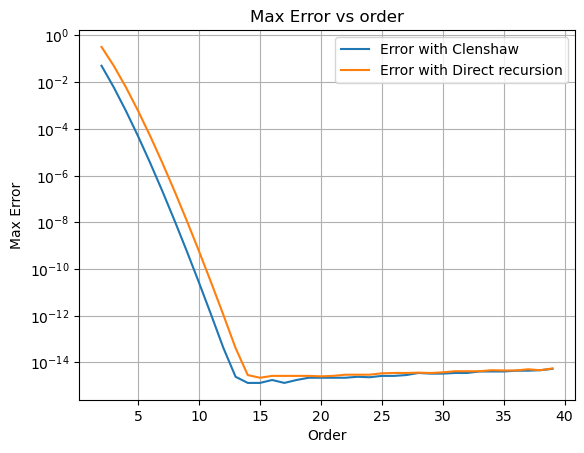

In [12]:
x = np.linspace(-1, 1, 1000)
y  = func(x)
exact_sum  = y
max_error_clen = []
max_error_dir = []

order = range(2,40)

for i in order:

    dir_sum = direct_sum(x,func,i,40)
    clen_sum = clenshaw_sum(x,func,i,40)

    error_clen = max(abs(exact_sum - clen_sum))
    error_direct = max(abs(exact_sum - dir_sum))

    max_error_clen.append(error_clen)
    max_error_dir.append(error_direct)

plt.semilogy(order,max_error_clen,label = "Error with Clenshaw")
plt.semilogy(order,max_error_dir,label="Error with Direct recursion")
plt.xlabel('Order')
plt.ylabel('Max Error')
plt.title('Max Error vs order')
plt.legend()
plt.grid(True)
plt.show()



    

In [13]:
from numpy import *

In [14]:
def b(n,x):
    return -1
def a(n,x):
    return 2*np.cos(x)
def T(n,x):
    if n == 0:
        return 1
    elif n == 1:
        return np.cos(x) - np.sin(x)

def direct_sum(x,f,n,m):
    c = fourier_coeffs(f,m)
    
    t = {}
    t[0] = 1
    t[1] = np.cos(x) - np.sin(x)
    val  =  c[0]*t[0] 
    for i in range(1,n):
        t[i+1] = 2*np.cos(x)*t[i] - t[i-1]- 2*(np.cos(x)*np.sin((n-1)*x) - np.sin((n-2)*x))
        val = val+c[i]*t[i]
    return val-1/2*c[0]
def compute_coeff(k,f, N):
    cj = (-1)**k*(np.exp(np.pi)-np.exp(-np.pi))/(np.pi*(1+k**2))

    return cj

def fourier_coeffs(f,N):
    Coeffs = {}
    Coeffs[0] = (np.exp(np.pi)-np.exp(-np.pi))/(2)
    for i in range(1,N+1):
        Coeffs[i] = compute_coeff(i,f,N)

    
    return Coeffs
def clenshaw_sum(x,f,n,m):
    c = fourier_coeffs(f,m)
    y = {}
    y[n+1] = 0
    y[n+2] = 0
    for k in reversed(range(1,n+1)):
        y[k] = a(k,x)*y[k+1]+ b(k+1,x)*y[k+2] + c[k]
    val = b(1,x)*T(0,x)*y[2] + T(1,x)*y[1] + T(0,x)*c[0]
    return val
def func(x):
    return np.exp(x)

In [15]:
import numpy as np
from scipy.integrate import quad

# Function to approximate
def func(x):
    return np.exp(x)

# Compute Fourier coefficients
def compute_coefficients(N):
    a = []
    b = []
    
    # a_0
    a0 = quad(lambda x: func(x), -1, 1)[0]
    a.append(a0 / 2)  # Divide a0 by 2 as per Fourier formula
    
    # a_n and b_n for n >= 1
    for n in range(1, N + 1):
        a_n = quad(lambda x: func(x) * np.cos(n * np.pi * x), -1, 1)[0]
        b_n = quad(lambda x: func(x) * np.sin(n * np.pi * x), -1, 1)[0]
        a.append(a_n)
        b.append(b_n)
    
    return a, b
def direct_sum(a, b, x, N):
    """
    Direct summation for Fourier series.
    a: Cosine coefficients
    b: Sine coefficients
    x: Input value
    N: Number of terms in the series
    """
    S = a[0] / 2  # Start with a0/2
    for n in range(1, N + 1):
        S += a[n] * np.cos(n * np.pi * x) + b[n - 1] * np.sin(n * np.pi * x)
    return S

# Clenshaw algorithm for Fourier series
def clenshaw_fourier(a, b, x):
    """
    Clenshaw algorithm for Fourier series.
    a: Cosine coefficients
    b: Sine coefficients
    x: Input value or array
    """
    N = len(a) - 1
    y_cos_plus2 = 0
    y_cos_plus1 = 0
    y_sin_plus2 = 0
    y_sin_plus1 = 0
    
    # Cosine recurrence
    for n in range(N, 0, -1):
        y_cos = 2 * np.cos(np.pi * x) * y_cos_plus1 - y_cos_plus2 + a[n]
        y_cos_plus2 = y_cos_plus1
        y_cos_plus1 = y_cos
    
    # Sine recurrence
    for n in range(N, 0, -1):
        y_sin = 2 * np.cos(np.pi * x) * y_sin_plus1 - y_sin_plus2 + b[n - 1]
        y_sin_plus2 = y_sin_plus1
        y_sin_plus1 = y_sin
    
    # Combine terms
    S = y_cos_plus1 + a[0]  # a0/2 is already included in a[0]
    S += y_sin_plus1
    
    return S

# Parameters
N = 10 # Number of terms in the Fourier series
x_vals = np.linspace(-1, 1, 500)  # Points to evaluate the series

# Compute coefficients




# Plot results


C:\Users\Asus\AppData\Local\Temp\ipykernel_14640\3407917371.py:19: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  a_n = quad(lambda x: func(x) * np.cos(n * np.pi * x), -1, 1)[0]
C:\Users\Asus\AppData\Local\Temp\ipykernel_14640\3407917371.py:20: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up t

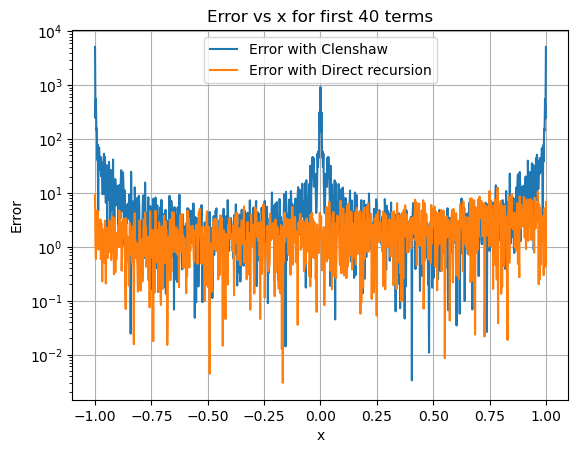

In [16]:
N = 1000
M= 1000
x = np.linspace(-1, 1, 1000)
y  = func(x)
a, b = compute_coefficients(M)
exact_sum  = y
dir_sum = direct_sum(a,b,x,N)
clen_sum = y_vals = [clenshaw_fourier(a, b, i) for i in x]#clenshaw_sum(x,func,N,M)



error_clen = abs(exact_sum - clen_sum)
error_direct = abs(exact_sum - dir_sum)


plt.semilogy(x,error_clen,label = "Error with Clenshaw")
plt.semilogy(x,error_direct,label="Error with Direct recursion")
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Error vs x for first 40 terms')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
import numpy as np

# Clenshaw algorithm for Chebyshev series
def clenshaw_chebyshev(a, x):
    """
    Evaluate the Chebyshev series using Clenshaw's algorithm.
    a: List of coefficients [a0, a1, ..., aN]
    x: The input value, should be in the range [-1, 1]
    """
    n = len(a) - 1
    b0 = 0.0
    b1 = 0.0
    for k in range(n, -1, -1):
        b0, b1 = a[k] + 2 * x * b1 - b0, b0
    return 0.5 * (b0 - b1)

# Direct method for Chebyshev series
def direct_chebyshev(a, x):
    """
    Direct evaluation of Chebyshev series sum.
    a: List of coefficients [a0, a1, ..., aN]
    x: The input value, should be in the range [-1, 1]
    """
    n = len(a)
    result = 0.0
    T_prev = 1  # T_0(x)
    T_curr = x  # T_1(x)
    
    for i in range(n):
        result += a[i] * T_prev
        T_next = 2 * x * T_curr - T_prev
        T_prev, T_curr = T_curr, T_next
        
    return result

# Clenshaw algorithm for Fourier series
def clenshaw_fourier(b, x):
    """
    Evaluate the Fourier series using Clenshaw's algorithm.
    b: List of coefficients [b0, b1, ..., bN]
    x: The input value
    """
    n = len(b) - 1
    b0 = 0.0
    b1 = 0.0
    for k in range(n, -1, -1):
        b0, b1 = b[k] + 2 * x * b1 - b0, b0
    return 0.5 * (b0 - b1)

# Direct method for Fourier series
def direct_fourier(b, x):
    """
    Direct evaluation of Fourier series sum.
    b: List of coefficients [b0, b1, ..., bN]
    x: The input value
    """
    n = len(b)
    result = 0.0
    for i in range(n):
        result += b[i] * np.cos(i * np.pi * x)
    return result

# Compute error for comparison
def compute_error(method, exact_func, coeffs, x_vals):
    errors = []
    for x in x_vals:
        approx = method(coeffs, x)
        exact = exact_func(x)
        errors.append(np.abs(approx - exact))
    return np.array(errors)

# Define the exact function for comparison (e^x)
def exact_func_chebyshev(x):
    return np.exp(x)  # exact function

def exact_func_fourier(x):
    return np.exp(x)  # exact function

# Define Chebyshev and Fourier coefficients for e^x approximation
def chebyshev_coefficients(N):
    # Using the first few coefficients for e^x approximation via Chebyshev series
    # In practice, these would be precomputed or derived analytically.
    x = np.linspace(-1, 1, 1000)
    y = np.exp(x)
    coeffs = np.polynomial.chebyshev.chebfit(x, y, N)
    return coeffs

def fourier_coefficients(N):
    # Fourier series for e^x can be approximated by computing coefficients
    x = np.linspace(-1, 1, 1000)
    y = np.exp(x)
    coeffs = np.fft.rfft(y, N)
    return coeffs

# Generate x values for error evaluation
x_vals = np.linspace(-1, 1, 100)

# Number of terms for the expansions
N_chebyshev = 40
N_fourier = 40

# Get the coefficients for both expansions
chebyshev_coeffs = chebyshev_coefficients(N_chebyshev)
fourier_coeffs = fourier_coefficients(N_fourier)

# Compute the error for Chebyshev and Fourier expansions
chebyshev_errors_clenshaw = compute_error(clenshaw_chebyshev, exact_func_chebyshev, chebyshev_coeffs, x_vals)
chebyshev_errors_direct = compute_error(direct_chebyshev, exact_func_chebyshev, chebyshev_coeffs, x_vals)

fourier_errors_clenshaw = compute_error(clenshaw_fourier, exact_func_fourier, fourier_coeffs, x_vals)
fourier_errors_direct = compute_error(direct_fourier, exact_func_fourier, fourier_coeffs, x_vals)

# Compute mean and standard deviation of errors
mean_error_clenshaw_chebyshev = np.mean(chebyshev_errors_clenshaw)
std_error_clenshaw_chebyshev = np.std(chebyshev_errors_clenshaw)

mean_error_direct_chebyshev = np.mean(chebyshev_errors_direct)
std_error_direct_chebyshev = np.std(chebyshev_errors_direct)

mean_error_clenshaw_fourier = np.mean(fourier_errors_clenshaw)
std_error_clenshaw_fourier = np.std(fourier_errors_clenshaw)

mean_error_direct_fourier = np.mean(fourier_errors_direct)
std_error_direct_fourier = np.std(fourier_errors_direct)

# Print the results
print(f"Chebyshev Method (Clenshaw) Mean Error: {mean_error_clenshaw_chebyshev:.6e}, Std Error: {std_error_clenshaw_chebyshev:.6e}")
print(f"Chebyshev Method (Direct) Mean Error: {mean_error_direct_chebyshev:.6e}, Std Error: {std_error_direct_chebyshev:.6e}")
print(f"Fourier Method (Clenshaw) Mean Error: {mean_error_clenshaw_fourier:.6e}, Std Error: {std_error_clenshaw_fourier:.6e}")
print(f"Fourier Method (Direct) Mean Error: {mean_error_direct_fourier:.6e}, Std Error: {std_error_direct_fourier:.6e}")

# Check the Clenshaw performance claim (30% better)
clenshaw_vs_direct_chebyshev = (mean_error_direct_chebyshev - mean_error_clenshaw_chebyshev) / mean_error_direct_chebyshev
clenshaw_vs_direct_fourier = (mean_error_direct_fourier - mean_error_clenshaw_fourier) / mean_error_direct_fourier

print(f"Clenshaw is {clenshaw_vs_direct_chebyshev * 100:.2f}% better for Chebyshev")
print(f"Clenshaw is {clenshaw_vs_direct_fourier * 100:.2f}% better for Fourier")


Chebyshev Method (Clenshaw) Mean Error: 1.441609e+00, Std Error: 5.739446e-01
Chebyshev Method (Direct) Mean Error: 2.032818e-15, Std Error: 3.285161e-15
Fourier Method (Clenshaw) Mean Error: 3.910672e+02, Std Error: 1.007877e+03
Fourier Method (Direct) Mean Error: 1.412718e+01, Std Error: 6.659062e-01
Clenshaw is -70916752107562200.00% better for Chebyshev
Clenshaw is -2668.19% better for Fourier


In [3]:
import numpy as np

PI = 3.141592653589793

def chebft(a, b, n, func):
    """
    Chebyshev Fit: Given a function func, lower and upper limits of the interval [a,b], 
    and a maximum degree n, this function computes the n coefficients c[0..n-1] such that
    func(x) ≈ sum(c[k] * T_k(y)) for k = 0 to n-1, where y and x are related by (5.8.10).
    """

    # Initialize an array to hold the function evaluations at Chebyshev nodes
    f = np.zeros(n)
    
    # Compute the mapping constants for interval transformation
    bma = 0.5 * (b - a)
    bpa = 0.5 * (b + a)

    # Evaluate the function at the n Chebyshev nodes
    for k in range(n):
        y = np.cos(PI * (k + 0.5) / n)  # Chebyshev node
        f[k] = func(y * bma + bpa)  # Evaluate func at the corresponding x value

    # Compute the Chebyshev coefficients
    fac = 2.0 / n
    c = np.zeros(n)  # Array to hold the coefficients

    for j in range(n):
        sum_val = 0.0
        for k in range(n):
            sum_val += f[k] * np.cos(PI * j * (k + 0.5) / n)
        c[j] = fac * sum_val

    return c

# Example usage
if __name__ == "__main__":
    # Define the function to approximate
    def func_example(x):
        return np.sin(x)

    # Interval [a, b] and degree n
    a = 0.0
    b = PI
    n = 50

    # Get the Chebyshev coefficients
    coefficients = chebft(a, b, n, func_example)

    # Print the coefficients
    print("Chebyshev coefficients:")
    print(coefficients)


Chebyshev coefficients:
[ 9.44002432e-01  1.07067133e-16 -4.99403258e-01  2.80678258e-17
  2.79920796e-02 -1.69894480e-16 -5.96695197e-04 -3.35235312e-18
  6.70439487e-06 -5.75451145e-17 -4.65322957e-08  2.50615501e-16
  2.19345758e-10 -3.28205345e-16 -7.48354703e-13  3.33444210e-16
  2.04724258e-15  3.68932315e-17  3.97416475e-16  2.99651796e-16
 -1.81859736e-16 -1.44198889e-17 -1.50617366e-17  3.53328478e-16
 -1.52837812e-16 -1.53392923e-17  2.76801151e-16 -2.71180647e-17
  6.80315179e-16  7.92053055e-17  4.68832872e-16 -1.90969202e-16
 -4.39997431e-16  5.02070174e-16 -3.38054237e-16  3.17165998e-16
 -1.71035061e-16 -1.44827726e-16  1.16754046e-15  3.38206026e-16
  1.64373723e-16 -8.12506529e-16 -5.30628059e-16 -7.43296483e-17
  1.55429055e-16  1.52315226e-16 -5.56533986e-16  8.85605066e-16
 -4.11164700e-17  2.70453012e-16]


In [4]:
import scipy.special as sp 
import numpy as np


def func(x):
    val = x*sp.j1(x)
    return val
coefficients = chebft(0,5,50,func)

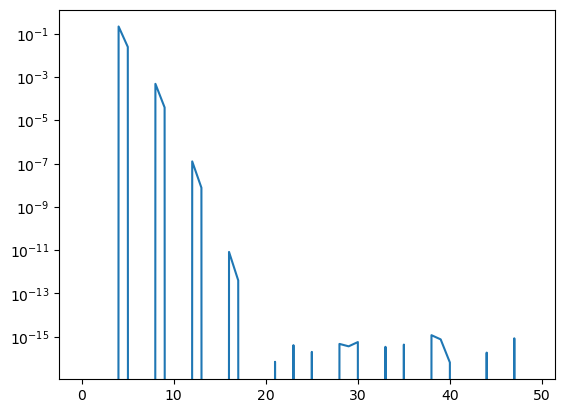

In [5]:
import matplotlib.pyplot as plt

plt.semilogy(coefficients)
#cut off 20

In [6]:
import numpy as np

def chebev(a, b, c, m, x):
    
    # Check if x is within the range [a, b]
    if (x - a) * (x - b) > 0.0:
        raise ValueError("x not in range in routine chebev")
    
    # Change of variable: mapping x to the Chebyshev domain [-1, 1]
    y = 2.0 * (x - (a + b) / 2.0) / (b - a)  # Transformed variable y
    y2 = 2.0 * y  # Precompute y^2 for efficiency
    
    # Clenshaw's recurrence to evaluate the Chebyshev series
    d = 0.0
    dd = 0.0
    for j in range(m - 1, 0, -1):
        sv = d
        d = y2 * d - dd + c[j]  # Recurrence relation
        dd = sv
    return y * d - dd + 0.5 * c[0]



In [7]:
x = np.linspace(0,5,1000)
y = np.array([chebev(0,5,coefficients,20,i) for i in x])
t = func(x)
err = abs(t-y)

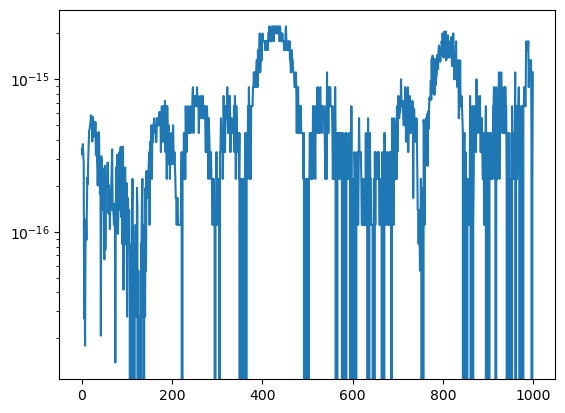

In [8]:
plt.semilogy(err)

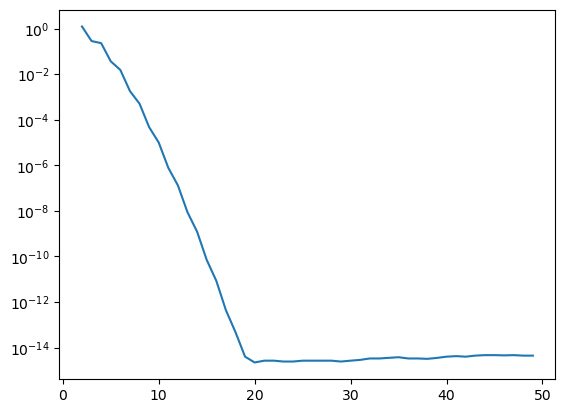

In [9]:
max_error= []
order = range(2,50)
for o in order:
    x = np.linspace(0,5,1000)
    y = np.array([chebev(0,5,coefficients,o,i) for i in x])
    t = func(x)
    err = abs(t-y)
    max_error.append(np.max(err))
plt.semilogy(order,max_error)

In [10]:
import numpy as np
def d_func(x):
    val =  x*sp.j0(x)
    return val

def chder(a, b, c, n):
    """
    Compute the Chebyshev coefficients of the derivative of a function represented by
    Chebyshev coefficients in array c.

    Args:
    a, b: The interval limits of the Chebyshev approximation.
    c: The Chebyshev coefficients of the function (output from chebft).
    n: The number of Chebyshev coefficients.

    Returns:
    cder: The Chebyshev coefficients of the derivative of the function.
    """
    # Initialize the array for the derivative coefficients
    cder = np.zeros(n)

    # Special cases for the last two coefficients
    cder[n-1] = 0.0
    cder[n-2] = 2 * (n - 1) * c[n - 1]

    # Apply the recurrence for the rest of the coefficients
    for j in range(n - 3, -1, -1):
        cder[j] = cder[j + 2] + 2 * (j + 1) * c[j + 1]

    # Normalize the derivative coefficients
    con = 2.0 / (b - a)
    cder *= con

    return cder

# Example usage
if __name__ == "__main__":
    # Example Chebyshev coefficients (output from chebft)
    c = np.array([1.0, -0.5, 0.25, -0.1, 0.05])  # Example coefficients
    a = 0.0  # Lower bound of the interval
    b = np.pi  # Upper bound of the interval
    n = len(c)  # Number of coefficients

    # Compute the Chebyshev coefficients of the derivative
    derivative_coeffs = chder(a, b, c, n)

    # Print the result
    print("Chebyshev coefficients of the derivative:")
    print(derivative_coeffs)


Chebyshev coefficients of the derivative:
[-1.01859164  0.89126768 -0.38197186  0.25464791  0.        ]


In [11]:
der_coeff = chder(0,5,coefficients,len(coefficients))
x = np.linspace(0,5,1000)
y = np.array([chebev(0,5,der_coeff,20,i) for i in x])
t = d_func(x)
err = abs(t-y)


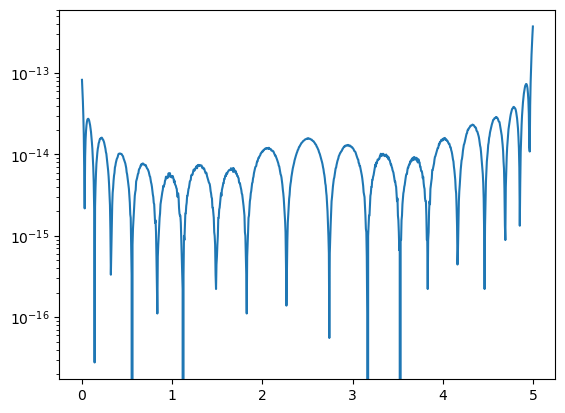

In [12]:
plt.semilogy(x,err)

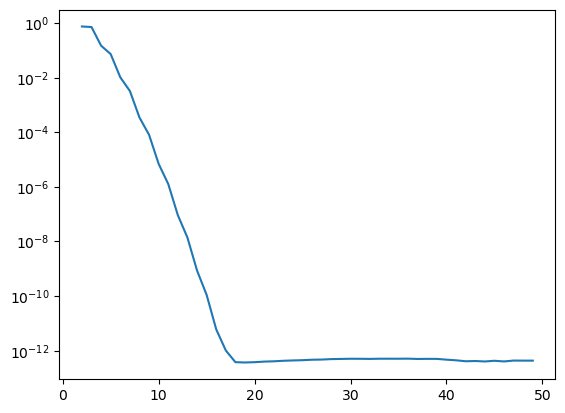

In [13]:
max_error= []
order = range(2,50)
for o in order:
    x = np.linspace(0,5,1000)
    y = np.array([chebev(0,5,der_coeff,o,i) for i in x])
    t = d_func(x)
    err = abs(t-y)
    max_error.append(np.max(err))
plt.semilogy(order,max_error)

In [14]:
def centered_derivative(delta,func,x):
    val = (func(x+delta/2)-func(x-delta/2))/(delta)
    return val
def non_centered_derivative(delta,func,x):
    val = (func(x+delta)-func(x))/(delta)
    return val

In [15]:
x = np.linspace(0,5,1000)
t = d_func(x)
delta = 0.0005
derivative_center = np.array([centered_derivative(delta,func,i) for i in x])
derivative_non_center = np.array([non_centered_derivative(delta,func,i) for i in x])
error_center = np.abs(t-derivative_center)
error_non_center = np.abs(t-derivative_non_center) 

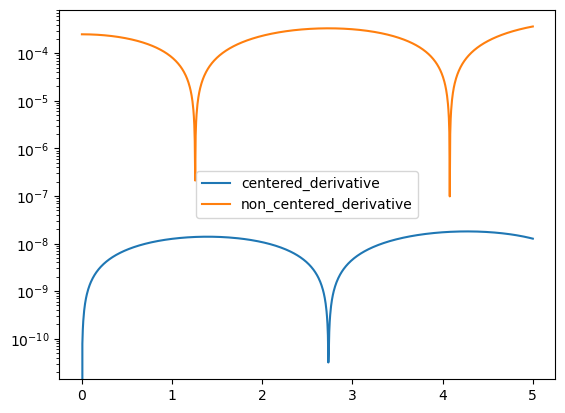

In [16]:
plt.semilogy(x,error_center,x,error_non_center)
plt.legend(["centered_derivative","non_centered_derivative"])

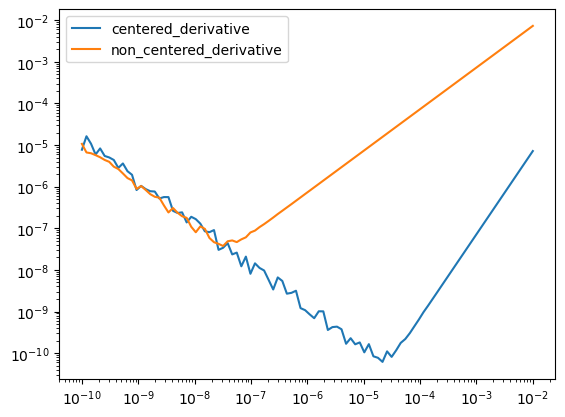

In [17]:
delta_list = np.logspace(-10,-2,100)
error_center = []
error_non_center=[]

x = np.linspace(0,5,1000)
t = d_func(x)

for delta in delta_list:
    derivative_center = np.array([centered_derivative(delta,func,i) for i in x])
    derivative_non_center = np.array([non_centered_derivative(delta,func,i) for i in x])
    error_center.append(np.max(np.abs(t-derivative_center)))
    error_non_center.append(np.max(np.abs(t-derivative_non_center)))

plt.loglog(delta_list,error_center,delta_list,error_non_center)
plt.legend(["centered_derivative","non_centered_derivative"])



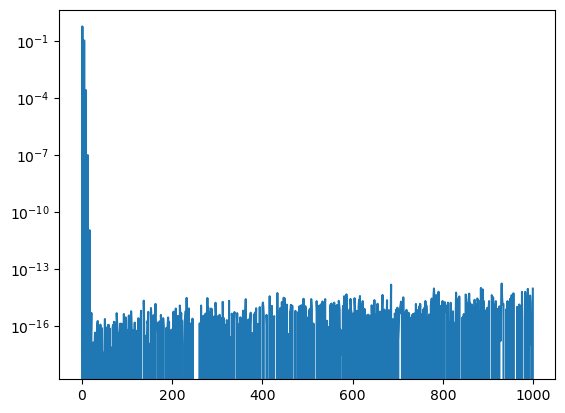

In [18]:
def func(x):
    val = np.sin(np.pi*x)
    return val
coeff  = chebft(-1,1,1000,func)
plt.semilogy(coeff)

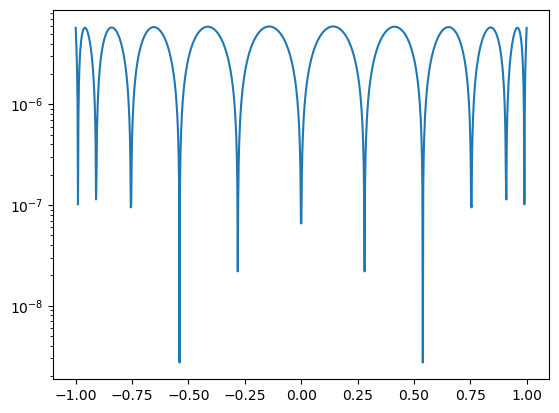

In [19]:
x = np.linspace(-1,1,1000)
t = func(x)
y = np.array([chebev(-1,1,coeff,10,i) for i in x])
err = np.abs(y-t)
plt.semilogy(x,err)






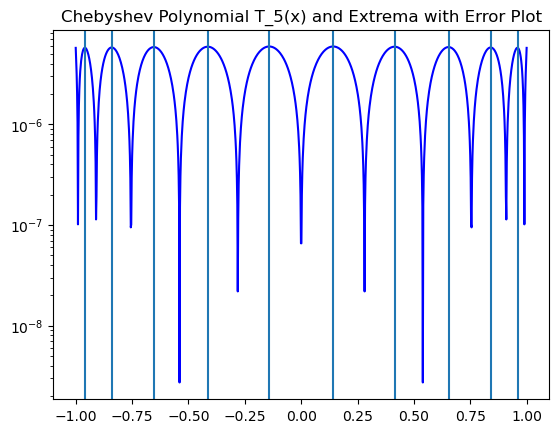

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def chebyshev_polynomial(n, x):
   
    return np.cos(n * np.arccos(x))

def chebyshev_extrema(n):

    k = np.arange(1, n)
    extrema = np.cos((k) * np.pi / n)
    return extrema
t10= chebyshev_polynomial(11,x)
plt.semilogy(x, err, label='Error function', color='blue')

#plt.semilogy(x,coeff[n+1]*t10,label ="estimated error")

extrema = chebyshev_extrema(11)

for ext in extrema:
    plt.vlines(ext,1e-10,1e-2)


plt.title(f"Chebyshev Polynomial T_{n}(x) and Extrema with Error Plot")

n = 10



In [21]:
def f(x,a):
    return np.exp(x)
def g(x,a):
    return 1/(x**2+a**2)
def h(x,a):
    return 1/(np.sin(np.pi*x/2)**2 + a**2)
def u(x,a):
    return np.exp(-np.abs(x))
def v(x,a):
    return np.sqrt(x +1.1)
def eval_cheb(sig,f,x,a,b):
    err = []
    order  = range(2,50)
    t = f(x,sig)
    coeff  = chebft(a,b,1000,lambda x : f(x,sig))
    for terms in order :
        y = np.array([chebev(a,b,coeff,terms,i) for i in x])
        err.append(np.max(np.abs(y-t)))
    return np.array(err),order
def plot_order_error(sigmas, fn,a,b):
    x = np.linspace(-1, 1, 1000)
    for sig in sigmas:
        err_f, order = eval_cheb(sig, fn, x, a, b)
        plt.semilogy(order, err_f, label=f"delta = {sig}")

    plt.title(f"Order vs error for {fn.__name__}")
    plt.legend()
    plt.show()


    

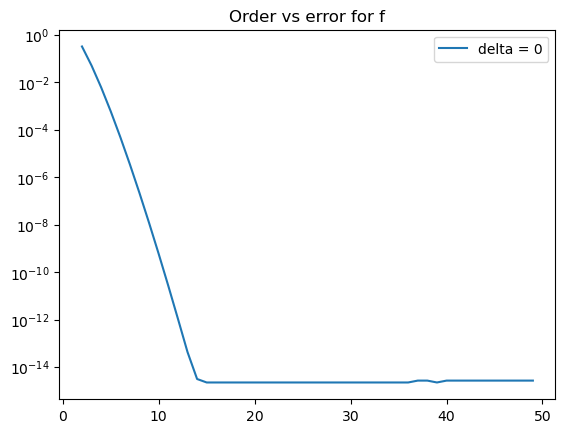

In [22]:
sigma = [0]
fn = [f]
for i in fn:
    plot_order_error(sigma,i,-1,1)

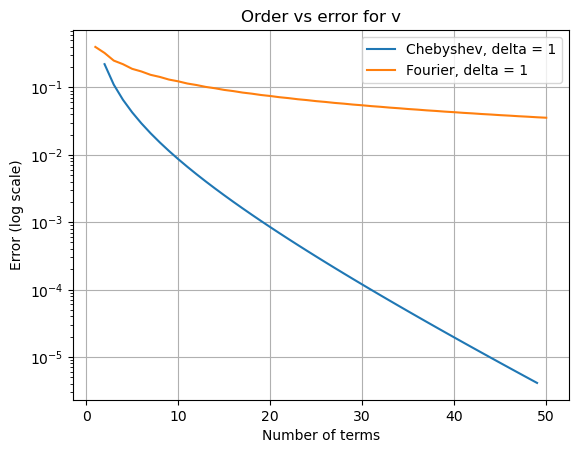

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Define the functions to approximate
def f(x, a):
    return np.exp(x)

def g(x, a):
    return 1 / (x**2 + a**2)

def h(x, a):
    return 1 / (np.sin(np.pi * x / 2)**2 + a**2)

def u(x, a):
    return np.exp(-np.abs(x))

def v(x, a):
    return np.sqrt(x + 1.01)

def compute_cosine_fourier_coefficients(func, N, a, b):
    c_coeffs = []
    for m in range(N + 1):
        # Numerator: Integral of f(x) * cos(m (x+1) π/2)
        numerator = quad(lambda x: func(x) * np.cos(m * (x + 1) * np.pi / 2), a, b)[0]
        
        # Denominator: Integral of cos^2(m (x+1) π/2)
        #denominator = quad(lambda x: np.cos(m * (x + 1) * np.pi / 2) ** 2, a, b)[0]
        
        # Compute c_m
        c_coeffs.append(numerator)
    return c_coeffs

# Direct sum for cosine-only Fourier series
def direct_sum_cosine(c, x, N):
    S = c[0] / 2  # Start with c_0 / 2
    for m in range(1, N + 1):
        S += c[m] * np.cos(m * (x + 1) * np.pi / 2)
    return S

# Evaluate Fourier error for cosine terms
def eval_fourier_error_cosine(sig, f, x, a, b, N_max=50):
    err = []
    for N in range(1, N_max + 1):
        c_n = compute_cosine_fourier_coefficients(f, N, a, b)
        reconstructed = np.array([direct_sum_cosine(c_n, xi, N) for xi in x])
        error = np.max(np.abs(f(x) - reconstructed))
        err.append(error)
    return np.array(err)

def eval_chebyshev_error(sig, f, x, a, b):
    err = []
    order = range(2, 50)
    t = f(x, sig)
    coeff = chebft(a, b, 1000, lambda x: f(x, sig))
    for terms in order:
        y = np.array([chebev(a, b, coeff, terms, i) for i in x])
        err.append(np.max(np.abs(y - t)))
    return np.array(err), order

def plot_order_error(sigmas, f, a, b):
    x = np.linspace(-1, 1, 1000)

    for sig in sigmas:
        err_cheb, order_cheb = eval_chebyshev_error(sig, f, x, a, b)
        plt.semilogy(order_cheb, err_cheb, label=f'Chebyshev, delta = {sig}')
    

    for sig in sigmas:
        err_fourier = eval_fourier_error_cosine(sig, lambda x: f(x, sig), x, a, b)
        plt.semilogy(range(1, len(err_fourier) + 1), err_fourier, label=f'Fourier, delta = {sig}')
    
    plt.title(f"Order vs error for {f.__name__}")
    plt.legend()
    plt.xlabel('Number of terms')
    plt.ylabel('Error (log scale)')
    plt.grid(True)
    plt.show()

sigmas = [1]
fn_list = [v]
for k in fn_list:
    plot_order_error(sigmas, k, -1, 1)



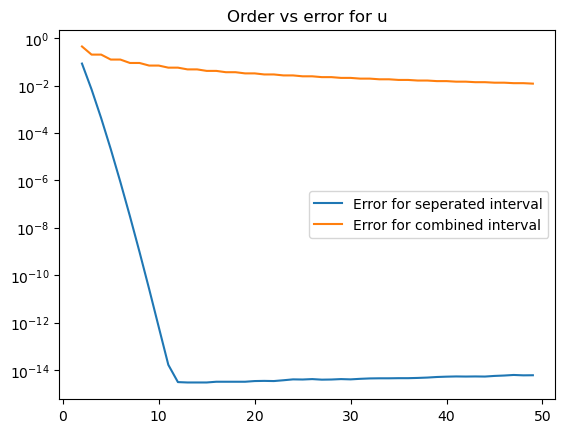

In [38]:
sigma = [-1.5,-0.5,0,0.5,1.5]
x = np.linspace(-1, 1, 1000)
x1 = np.linspace(0,1,500)
x2 = np.linspace(-1,0,500)
err_u1, order = eval_cheb(0, u, x1, 0, 1)
err_u2,order = eval_cheb(0,u,x2,-1,0)
err_u,order = eval_cheb(0,u,x,-1,1)
plt.semilogy(order, err_u1+err_u2,label = "Error for seperated interval")
plt.semilogy(order, err_u,label = "Error for combined interval")

plt.title(f"Order vs error for {u.__name__}")
plt.legend()
plt.show()

In [58]:
def fourier_coeff(a, b, n, func):
    x = np.linspace(a, b, n)
    dx = (b - a) / (n - 1)

    coeff_cos = []
    coeff_sin = []

    for k in range(int(n / 10)):
        basis_cos = np.cos(2 * np.pi * k * (x - a) / (b - a))
        coeff_cos.append(np.sum(func(x) * basis_cos) * dx / (b - a))

        if k > 0:
            basis_sin = np.sin(2 * np.pi * k * (x - a) / (b - a))
            coeff_sin.append(np.sum(func(x) * basis_sin) * dx / (b - a))

    return np.array(coeff_cos), np.array(coeff_sin)

def fourier_eval(a, b, coeff_cos, coeff_sin, terms, x):
    val = np.zeros_like(x)
    #print("length",len(coeff_cos),len(coeff_sin),terms)
    for k in range(terms):
        val += coeff_cos[k] * np.cos(2 * np.pi * k * (x - a) / (b - a))
        if k > 0 and k < len(coeff_sin):
            val += coeff_sin[k - 1] * np.sin(2 * np.pi * k * (x - a) / (b - a))

    return val
# def fourier_coeff_fft(a, b, n, func):

#     x = np.linspace(a, b, n)
#     dx = (b - a) / (n - 1)
    

#     f_values = func(x)
    

#     fft_vals = np.fft.fft(f_values)
    

#     fft_vals = fft_vals * dx / (b - a)
    
  
#     coeff_cos = np.real(fft_vals)[:n // 2]  
#     coeff_sin = np.imag(fft_vals)[1:n // 2]  
    
#     return coeff_cos, coeff_sin

# def fourier_eval(a, b, coeff_cos, coeff_sin, terms, x):
#     val = np.zeros_like(x)
 
#     for k in range(terms):
#         val += coeff_cos[k] * np.cos(2 * np.pi * k * (x - a) / (b - a))
#         if k > 0 and k < len(coeff_sin):
#             val += coeff_sin[k - 1] * np.sin(2 * np.pi * k * (x - a) / (b - a))
    
#     return val

def eval_fourier(sig, f, x, a, b):
    err = []
    order = range(2, 50)
    t = f(x, sig)
    coeff_cos,coeff_sin = fourier_coeff(a, b, 1000, lambda x: f(x, sig))
    for terms in order:
        y = np.array([fourier_eval(a, b, coeff_cos,coeff_sin, terms, i) for i in x])
        err.append(np.max(np.abs(y - t)))
    return np.array(err), order

def plot_order_error(sigmas, fn, a, b):
    x = np.linspace(-1, 1, 1000)
    for sig in sigmas:
        err_f, order = eval_fourier(sig, fn, x, a, b)
        plt.semilogy(order, err_f, label=f"delta = {sig}")

    plt.title(f"Order vs error for {fn.__name__}")
    plt.legend()
    plt.show()


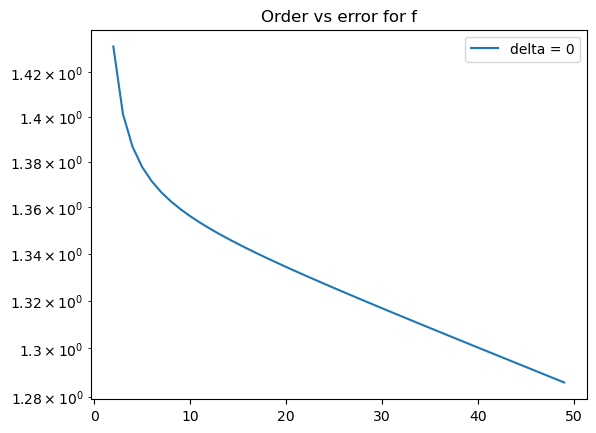

In [59]:
sigma = [0]
fn = [f]
for i in fn:
    plot_order_error(sigma,i,-1,1)

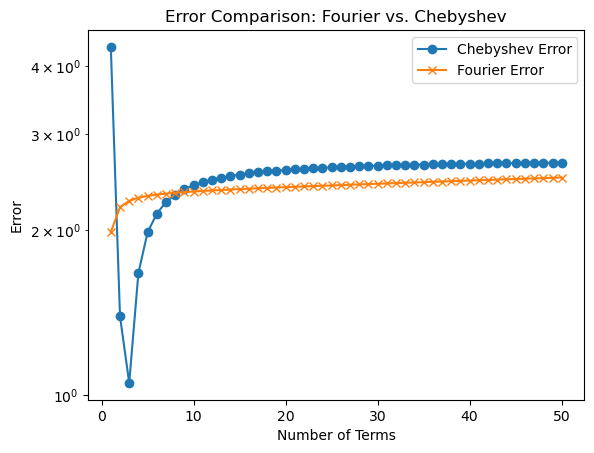

In [68]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.exp(x)

def g(x, delta):
    return 1 / (x**2 + delta**2)

def h(x, delta):
    return 1 / np.sin(np.pi * x / 2)**2 + delta**2

def u(x):
    return np.exp(-np.abs(x))

def v(x):
    return np.sqrt(x + 1.1)

def chebyshev_polynomials(x, n):
    return np.cos(n * np.arccos(x))

def chebyshev_expansion(func, N, num_samples=1000):
    x_vals = np.linspace(-1, 1, num_samples)
    y_vals = func(x_vals)
    
    c_n = np.zeros(N)
    
    for n in range(num_samples):
        c_n[n] = (2 / N) * np.sum(y_vals * chebyshev_polynomials(x_vals, n)) * (x_vals[1] - x_vals[0])
        
    return c_n, x_vals, y_vals

def fourier_expansion(func, N, num_samples=1000):
    x_vals = np.linspace(-1, 1, num_samples)
    y_vals = func(x_vals)
    T = 2
    omega = 2 * np.pi / T
    a_n = np.zeros(N)
    b_n = np.zeros(N)
    for n in range(num_samples):
        a_n[n] = (2 / T) * np.sum(y_vals * np.cos(n * omega * x_vals)) * (x_vals[1] - x_vals[0])
        b_n[n] = (2 / T) * np.sum(y_vals * np.sin(n * omega * x_vals)) * (x_vals[1] - x_vals[0])
    return a_n, b_n, x_vals, y_vals

def reconstruct_fourier_series(a_n, b_n, N, x_vals):
    reconstructed_vals = np.zeros_like(x_vals)
    for n in range(N):
        reconstructed_vals += a_n[n] * np.cos(n * np.pi * x_vals) + b_n[n] * np.sin(n * np.pi * x_vals)
    return reconstructed_vals

def calculate_error(true_vals, approx_vals):
    return np.max(np.abs(true_vals - approx_vals))

def compare_errors(func, N_max=50, delta=0.5):
    errors_chebyshev = []
    errors_fourier = []
    
    for N in range(1, N_max + 1):
        chebyshev_coeffs, x_cheby, y_cheby = chebyshev_expansion(func)
        reconstructed_cheby = np.sum([chebyshev_coeffs[n] * chebyshev_polynomials(x_cheby, n) for n in range(N)], axis=0)
        error_cheby = calculate_error(func(x_cheby), reconstructed_cheby)
        errors_chebyshev.append(error_cheby)
        
        a_n, b_n, x_fourier, y_fourier = fourier_expansion(func, N)
        reconstructed_fourier = reconstruct_fourier_series(a_n, b_n, N, x_fourier)
        error_fourier = calculate_error(func(x_fourier), reconstructed_fourier)
        errors_fourier.append(error_fourier)
    
    plt.plot(range(1, N_max + 1), errors_chebyshev, label='Chebyshev Error', marker='o')
    plt.plot(range(1, N_max + 1), errors_fourier, label='Fourier Error', marker='x')
    plt.xlabel('Number of Terms')
    plt.ylabel('Error')
    plt.legend()
    plt.title('Error Comparison: Fourier vs. Chebyshev')
    plt.yscale('log')
    plt.show()

compare_errors(f, N_max=50, delta=0.5)



